Kitsap County Housing Price Estimator 5/16/2025 5:45pm - 7:16 start to finish inlcluding notes

This project builds a simple linear regression model to predict home prices in Kitsap County, WA. It looks at factors like square footage, bedrooms, and year built to estimate pricing trends.

At the bottom of the code I uncluded a markdown of some errors I ran into and how I was able to resolve them. As well as data reference.

In [16]:
#import libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# create data set
data = {
    'Square_Feet': [1200, 1600, 2000, 2400, 3000],
    'Bedrooms': [2, 3, 4, 4, 5],
    'Age': [5, 15, 20, 25, 30],
    'Price': [280000, 320000, 350000, 400000, 450000]
}


In [18]:
# create dataframe
df = pd.DataFrame(data)

# Split data to separate features (input) and target (output)
x = df[["Square_Feet", "Bedrooms", "Age"]]
y = df["Price"]

In [19]:

#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [20]:
#train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

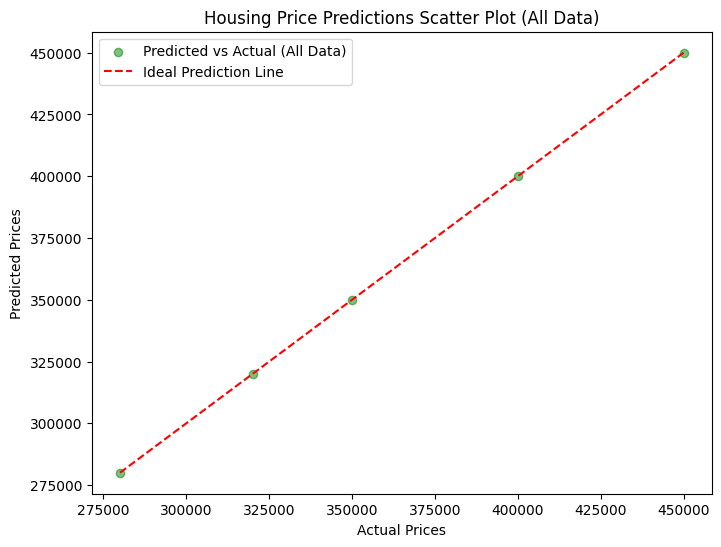

In [21]:
import matplotlib.pyplot as plt

all_predicted_prices = model.predict(x)
plt.figure(figsize=(8,6))
plt.scatter(y, all_predicted_prices, alpha=0.5, color='green', label="Predicted vs Actual (All Data)")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="dashed", label="Ideal Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Housing Price Predictions Scatter Plot (All Data)")
plt.legend()
plt.show()


In [22]:
#Evaluate Model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


In [23]:
# convert the new house data to a dataframe
feature_names = ['Square_Feet', 'Bedrooms', 'Age']
new_house_df = pd.DataFrame([[2800, 3, 15]], columns=feature_names)


In [24]:
# verifying the number of features " Should be 3"
print(model.n_features_in_)

3


In [25]:
#Prediction
predicted_price = model.predict(new_house_df)
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")

Predicted price for the new house: $440,000.00


5/19/2025 Input scatter Plot for visualization

In [26]:
#import matplotlib
import matplotlib.pyplot as plt
actual_prices = y_test
predicted_prices = model.predict(X_test)



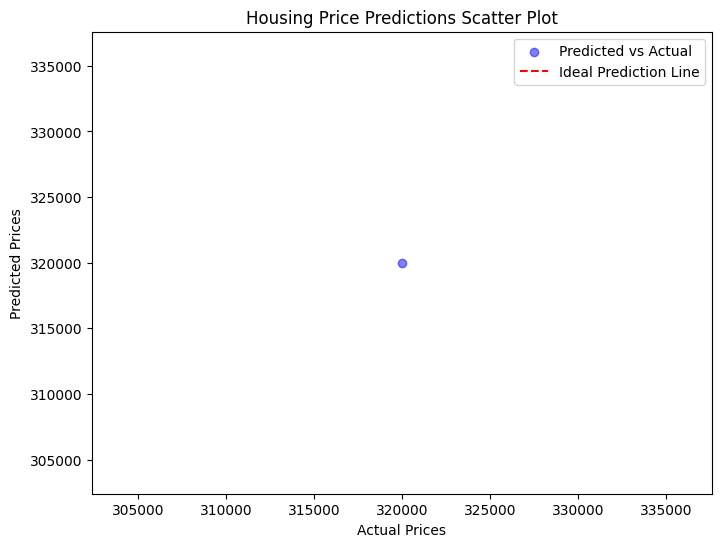

In [27]:
#create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], color="red", linestyle="dashed", label="Ideal Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Housing Price Predictions Scatter Plot")
plt.legend()
plt.show()

5/19/2025 Update

#import matplotlib
import matplotlib.pyplot as plt
actual_prices = y_test
predicted_prices = model.predict(X_test)

#create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], color="red", linestyle="dashed", label="Ideal Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Housing Price Predictions Scatter Plot")
plt.legend()
plt.show()




Ran into 3 problems I had to fix

error_one: 
    ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.
        I looked this up using "print(model.n_features)
            correction: In training data i retrained with correct features. Input and training were not matching

error_two:  
    UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names.
        Model was trained using a dataframe with named columns, but the input was a numpy array without feature names
            correction: 
            feature_names = ['Square_Feet', 'Bedrooms', 'Age']
            new_house_df = pd.DataFrame([[1500, 3, 10]], columns=feature_names)

            predicted_price = model.predict(new_house_df)
            print(f"Predicted price: ${predicted_price[0]:,.2f}")

error_three:
    Mean Squared Error: 7554461.201737564
    the model in essence works however there is a very high varience
        Correction this could just be the model type, over/underfitting, better data.

All in all this was my first attempt and I am proud of it. Any advice is greatly appreciated

Dataset Reference: Federal Reserve Economic Data (FRED)
kitsap county, WA January 2017-January 2025
https://fred.stlouisfed.org/series/MEDSQUFEE53035
    
